In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/countries_non_pop.csv');

In [2]:
years = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']

In [3]:
df_canada = df[df['Country Name'].str.contains("Canada")]

In [4]:
birth_rate = df_canada[df_canada['Indicator Name'] == 'Birth rate, crude (per 1,000 people)'].iloc[:, 5:].T
death_rate = df_canada[df_canada['Indicator Name'] == 'Death rate, crude (per 1,000 people)'].iloc[:, 5:].T
birth_rate.columns = ['Birth Rate']
death_rate.columns = ['Death Rate']
birth_rate.index.name = 'Year'
death_rate.index.name = 'Year'
combined_data = birth_rate.join(death_rate)
combined_data.index = combined_data.index
filtered_data = combined_data[combined_data.index.astype(int) % 5 == 0]

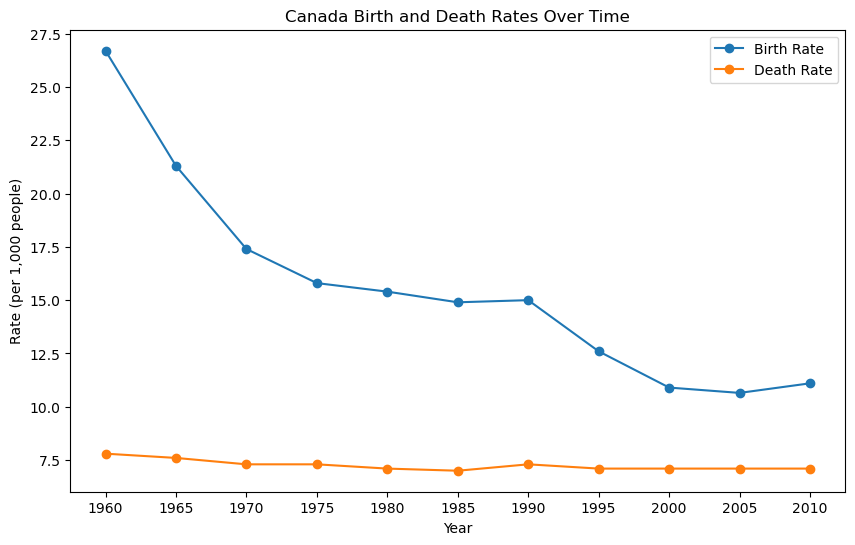

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Birth Rate'], marker='o', label='Birth Rate')
plt.plot(filtered_data['Death Rate'], marker='o', label='Death Rate')
plt.title('Canada Birth and Death Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate (per 1,000 people)')
plt.legend()
plt.show()

In [7]:
df_canada['Indicator Name'].unique()

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Fertility rate, total (births per woman)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, under-5 (per 1,000)', 'Number of infant deaths',
       'Number of under-five deaths',
       'Survival to age 65, female (% of cohort)',
       'Survival to age 65, male (% of cohort)'], dtype=object)

In [13]:
life_expectancy_f_df = df_canada[df_canada['Indicator Name'] == 'Life expectancy at birth, female (years)'].iloc[:, 5:].T
life_expectancy_m_df = df_canada[df_canada['Indicator Name'] == 'Life expectancy at birth, male (years)'].iloc[:, 5:].T
life_expectancy_f_df.columns = ['Female Life Expectancy at Birth']
life_expectancy_m_df.columns = ['Male Life Expectancy at Birth']
life_expectancy_f_df.index.name = 'Years'
life_expectancy_m_df.index.name = 'Years'

combined_le_data = life_expectancy_f_df.join(life_expectancy_m_df)
combined_le_data.index = combined_le_data.index
filtered_le_data = combined_le_data[combined_le_data.index.astype(int) % 5 == 0]

survival_65_f_df = df_canada[df_canada['Indicator Name'] == "Survival to age 65, female (% of cohort)"].iloc[:, 5:].T
survival_65_m_df = df_canada[df_canada['Indicator Name'] == "Survival to age 65, male (% of cohort)"].iloc[:, 5:].T

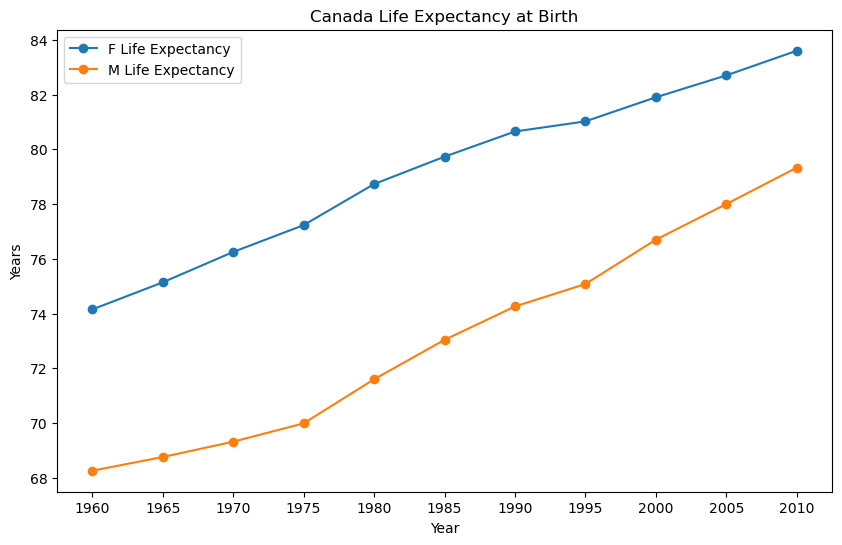

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_le_data['Female Life Expectancy at Birth'], marker='o', label='F Life Expectancy')
plt.plot(filtered_le_data['Male Life Expectancy at Birth'], marker='o', label='M Life Expectancy')
plt.title('Canada Life Expectancy at Birth')
plt.xlabel('Year')
plt.ylabel('Years')
plt.legend()
plt.show()